In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv("filtered_data.csv")  
df = pd.DataFrame(data)

In [20]:
# Mapped categorical "Order_Priority" values to numeric values
order_priority_mapping = {
    "High": 3,
    "Medium": 2,
    "Low": 1,
    "Not Specified": 0,
    "Critical": 0
}

# Mapped the "Order_Priority" column using the mapping
df["Order_Priority"] = df["Order_Priority"].map(order_priority_mapping)


In [21]:
# Defined the features (independent variables)
X = df[['Sales', 'Order_Quantity', 'Profit', 'Order_Priority']]

y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Confusion Matrix:
[[19  1]
 [ 6  8]]


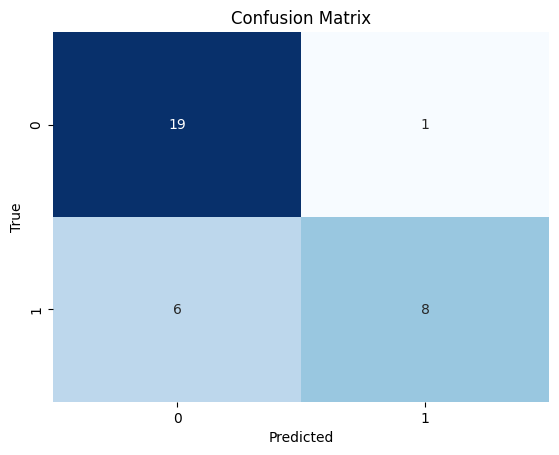

In [22]:
# Added a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Created a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Calculated accuracy for evaluation
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


In [24]:
# Created a new row of data for prediction
new_data = {
    'Sales': [1500],
    'Order_Quantity': [100],
    'Profit': [500],
    'Order_Priority': [2]  # Replace with the desired order priority value (e.g., 2 for "Medium")
}
new_df = pd.DataFrame(new_data)

# Make a prediction for the new data
predicted_product = model.predict(new_df)

if predicted_product == 1:
    print('Predicted Product: Yes')
else:
    print('Predicted Product: No')

Predicted Product: No


In [17]:
model = SVC(random_state=42)
model.fit(X_train, y_train)  # Assuming you have already trained the model

test_data = pd.read_csv("test.csv")  # Replace with the path to your "test.csv" file
test_df = pd.DataFrame(test_data)

# Mapped categorical "Order_Priority" values to numeric values
test_df["Order_Priority"] = test_df["Order_Priority"].map(order_priority_mapping)

# Defined the features (independent variables) for the test dataset
X_test = test_df[['Sales', 'Order_Quantity', 'Profit', 'Order_Priority']]

# Made predictions on the test dataset
test_predictions = model.predict(X_test)

# Mapped binary predictions to "Yes" or "No"
test_predictions = ["Yes" if pred == 1 else "No" for pred in test_predictions]

# Added the "Result" column to the test dataset
test_df["Result"] = test_predictions

# Saved the updated test dataset with the "Result" column
test_df.to_csv("test_results.csv", index=False)  
